In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

# Fetch PES Points 

In [3]:
path = "../TaskC/pes.tab"

r = []
E_HF = []
E_CCSDT = []

with open(path, "r") as f:
    for line in f:
        try:
            splits = list(map(float, line.split()))

            r.append(splits[0])
            E_HF.append(splits[1])
            E_CCSDT.append(splits[2])
        except:
            pass
        
#r = np.asarray(r)
E_HF = np.asarray(E_HF)
E_CCSDT = np.asarray(E_CCSDT)

### Convert energies to SI: Hartree -> Joule 

In [4]:
from scipy.constants import physical_constants

conversion_hartree_to_joule = physical_constants["Hartree energy"][0]

E_HF *= conversion_hartree_to_joule
E_CCSDT *= conversion_hartree_to_joule

# PChip Interpolation 

In [5]:
from scipy.interpolate import PchipInterpolator as PChip

interpolator_HF = PChip(r, E_HF)
interpolator_CCSDT = PChip(r, E_CCSDT)

# Display PES 

## Data 

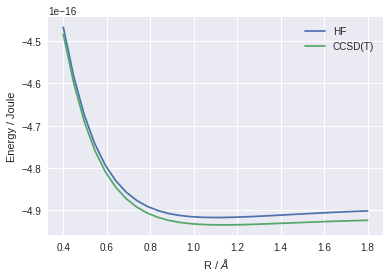

In [6]:
plt.plot(r, E_HF, label="HF")
plt.plot(r, E_CCSDT, label="CCSD(T)")

plt.xlabel("R / $\AA$")
plt.ylabel("Energy / Joule")

plt.legend()

## Interpolated 

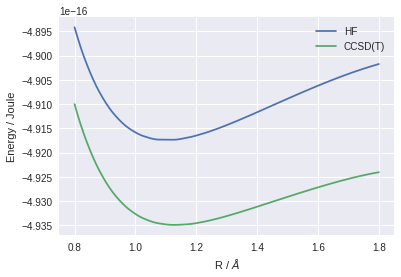

In [7]:
t = np.linspace(0.8, 1.8, 500)

plt.plot(t, interpolator_HF(t), label="HF")
plt.plot(t, interpolator_CCSDT(t), label="CCSD(T)")

plt.xlabel("R / $\AA$")
plt.ylabel("Energy / Joule")

plt.legend()

# Make Hamiltonian 

In [287]:
# dimensio of hamiltonian
N = 1000

In [288]:
from scipy.constants import physical_constants

u = physical_constants["atomic mass constant"][0]

m_C = 12 * u
m_O = 16 * u

## Kinetic Term

In [289]:
from scipy.constants import hbar
from scipy.sparse import diags

mu = m_C * m_O / (m_C + m_O)

P = hbar**2 / (2 * mu) * (
    diags(2 * np.ones(N)) + \
    diags(-1 * np.ones(N-1), -1) + \
    diags(-1 * np.ones(N-1), +1)
)

np.mean(P)

9.766973735654815e-49

In [290]:
hbar, m_C, m_O

(1.0545718001391127e-34, 1.992646848e-26, 2.656862464e-26)

## Potential Term 

In [291]:
r = np.linspace(0.8, 1.8, N)
#r = np.linspace(1.0, 1.325, N)

U_HF = diags(interpolator_HF(r))
U_CCSDT = diags(interpolator_CCSDT(r))

np.mean(U_HF)

-4.910387718190623e-19

## H = P + U 

In [292]:
H_HF = P + U_HF
H_CCSDT = P + U_CCSDT

#  Solve Finite Differences Equations


Eigenvalueproblem: $\hat{H} |\psi\rangle = E |\psi\rangle$

Finite differences: $\psi = \{\psi_1, \psi_2, \ldots, \psi_n\}$

In [293]:
# numer of eigen values 
n = 30

In [294]:
from scipy.constants import physical_constants
conversion_joule_to_eV = 1 / physical_constants["electron volt"][0]

## HF 

In [295]:
from scipy.sparse.linalg import eigsh

E, psi = eigsh(H_HF, n)

In [296]:
print(E * conversion_joule_to_eV)

[-3069.16632673 -3069.16632522 -3069.16630414 -3069.16626446
 -3069.16620776 -3069.16613413 -3069.16604364 -3069.1660422
 -3069.16593638 -3069.16581242 -3069.16567185 -3069.16551476
 -3069.16535528 -3069.16534122 -3069.16515131 -3069.16494511
 -3069.16472271 -3069.16448419 -3069.16427536 -3069.16422962
 -3069.1639591  -3069.1636727  -3069.16337049 -3069.16305258
 -3069.16281334 -3069.16271902 -3069.16236991 -3069.16200533
 -3069.16162536 -3069.16123008]


In [297]:
print(np.diff(E) * conversion_joule_to_eV)

[1.51159023e-06 2.10722941e-05 3.96822569e-05 5.66993427e-05
 7.36351138e-05 9.04896921e-05 1.43771469e-06 1.05825215e-04
 1.23954859e-04 1.40565587e-04 1.57094948e-04 1.59479892e-04
 1.40631587e-05 1.89909944e-04 2.06195448e-04 2.22399723e-04
 2.38522734e-04 2.08829540e-04 4.57348925e-05 2.70524829e-04
 2.86403952e-04 3.02201813e-04 3.17918419e-04 2.39232593e-04
 9.43210939e-05 3.49107680e-04 3.64580423e-04 3.79971857e-04
 3.95282022e-04]


## CCSD(T) 

In [298]:
E, psi = eigsh(H_CCSDT, n)

In [286]:
print(E * conversion_joule_to_eV)

[-3080.12122933 -3080.11705391 -3080.10653588 -3080.10379169
 -3080.08367009 -3080.0710261  -3080.05885318 -3080.03131665
 -3080.020365   -3079.99048466 -3079.96021758 -3079.93322901
 -3079.89449022 -3079.8651366  -3079.80291848 -3079.79179436
 -3079.71783926 -3079.68295223 -3079.63668291 -3079.54764763
 -3079.54076632 -3079.45305408 -3079.38253559 -3079.35522292
 -3079.25536972 -3079.2098506  -3079.1503749  -3079.04096252
 -3079.00383046 -3078.92844243]


In [258]:
print(np.diff(E) * conversion_joule_to_eV)

[0.02355576 0.01371019 0.0347811  0.07094621 0.00811401 0.13440787
 0.00528419 0.14606257 0.10686377 0.07158185 0.19688729 0.05764715
 0.15393567 0.22699665 0.05382145 0.18116989 0.24544392 0.12645417
 0.12387124 0.25568067 0.25865219 0.03450114 0.22535493 0.2610835
 0.25983173 0.09390596 0.16521009 0.25651604 0.25393386]


# Plot energy levels 

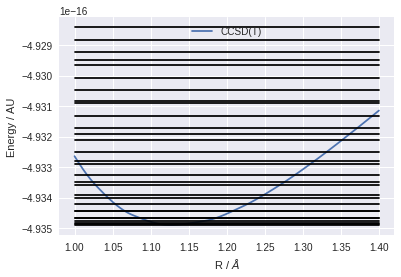

In [260]:
t = np.linspace(1.0, 1.4, 500)

plt.plot(t, interpolator_CCSDT(t), label="CCSD(T)")
for e in  eigsh(H_CCSDT, 30)[0]:
    plt.plot([1.0, 1.4], [e,e], "k-")


plt.xlabel("R / $\AA$")
plt.ylabel("Energy / AU")

plt.legend()

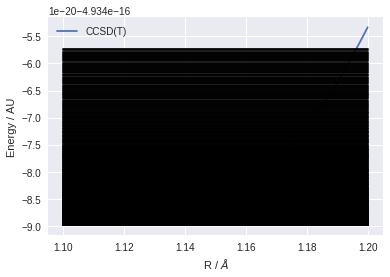

In [208]:
t = np.linspace(1.1, 1.2, 500)

plt.plot(t, interpolator_CCSDT(t), label="CCSD(T)")
for e in  eigsh(H_CCSDT, 300)[0]:
    plt.plot([1.1, 1.2], [e,e], "k-")


plt.xlabel("R / $\AA$")
plt.ylabel("Energy / AU")

plt.legend()